In [ ]:
import pandas as pd
import pylab as plt
import os
import seaborn as sns
import re
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt



Questions asked: 
1. Where are UFOs sighted? Focus on the regions where was a high density of reported UFOs (UK and USA)
2. Do UFO sightings have anything to do with meteorite landings or fireball reports? 

Plotted data on Basemap




In [159]:
data_directory = os.path.join("..","Space Data")

In [160]:
# List all the files available with the 'ls' command
from subprocess import check_output
print(check_output(["ls",data_directory]).decode("utf8"))

Fireball Reports.csv
GIN_Basics.ipynb
GIN_Clustering.ipynb
GIN_Merging.ipynb
GIN_Plotting.ipynb
Meteorite_Landings.csv
SolarSystemAndEarthquakes.csv
UFO.ipynb
UFO_Sightings_Global.csv
astronauts.csv
exoplanets.csv
texas.html
tile.html
ufo_sights.html
ufo_sights_.html
ufo_sights_usa.html



In [161]:
df = pd.read_csv(os.path.join(data_directory, 'UFO_Sightings_Global.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117896 entries, 0 to 117895
Data columns (total 10 columns):
day_sighted     117896 non-null object
time            117896 non-null object
Shape           114067 non-null object
duration (s)    100995 non-null float64
Location        117896 non-null object
country         117116 non-null object
description     117895 non-null object
latitude        96408 non-null object
longitude       96408 non-null float64
State/Region    107192 non-null object
dtypes: float64(2), object(8)
memory usage: 9.0+ MB


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [162]:
df.head()

,day_sighted,time,Shape,duration (s),Location,country,description,latitude,longitude,State/Region
0,2019-01-31,21:00:00,light,600.0,"Las vegas, NV",United States,Pink light in sky making light orbs you could ...,36.175,-115.136389,Nevada
1,2019-01-31,20:27:00,other,NaN,"Lumpkin, GA",United States,Unidentifiable shape hovering over field in Lu...,32.0508,-84.799167,Georgia
2,2019-01-31,18:00:00,circle,360.0,"Hollywood, CA",United States,Circular red object with green flashing light ...,34.0983,-118.325833,California
3,2019-01-31,18:00:00,fireball,1200.0,"Albany, OR",United States,Was outside having a smoke while I had seen lo...,44.6367,-123.104722,Oregon
4,2019-01-31,04:30:00,circle,300.0,"Seattle, WA",United States,Small Blue Orb traveling east from Magnolia to...,47.6064,-122.330833,Washington


In [163]:
df = df[df.latitude.notnull()]
df = df[df.longitude.notnull()]
df.tail()

,day_sighted,time,Shape,duration (s),Location,country,description,latitude,longitude,State/Region
112812,2004-04-15,03:45:00,other,NaN,"Canada, MB",canada,"Airplane frozen in air, Black car, 2 individua...",53.760861,-98.813876,NaN
113394,1999-06-01,17:00:00,light,1200.0,"Canada, NT",canada,red light similari saw something similar! i ha...,56.130366,-106.346771,NaN
113504,1995-07-07,15:00:00,NaN,10.0,"Canada, BC",canada,Woman on flight from AK to Seattle sees bizarr...,53.726668,-127.647621,NaN
113594,1982-06-30,00:00:00,NaN,NaN,"Canada, BC",canada,There was no vehicle they hiked to the top of ...,53.726668,-127.647621,NaN
117841,1993-07-02,22:30:00,NaN,300.0,"Puerto Rico, PR",united states,Well it was at night along a beach in puerto r...,18.220833,-66.590149,NaN


In [164]:
df['latitude']=df['latitude'].astype(str)
df['lat'] = df['latitude'].str.replace('q', '')
df['lon'] = df['longitude']
df['lat']=df['lat'].astype(float)

df.head()

,day_sighted,time,Shape,duration (s),Location,country,description,latitude,longitude,State/Region,lat,lon
0,2019-01-31,21:00:00,light,600.0,"Las vegas, NV",United States,Pink light in sky making light orbs you could ...,36.175,-115.136389,Nevada,36.175000,-115.136389
1,2019-01-31,20:27:00,other,NaN,"Lumpkin, GA",United States,Unidentifiable shape hovering over field in Lu...,32.0508333,-84.799167,Georgia,32.050833,-84.799167
2,2019-01-31,18:00:00,circle,360.0,"Hollywood, CA",United States,Circular red object with green flashing light ...,34.0983333,-118.325833,California,34.098333,-118.325833
3,2019-01-31,18:00:00,fireball,1200.0,"Albany, OR",United States,Was outside having a smoke while I had seen lo...,44.6366667,-123.104722,Oregon,44.636667,-123.104722
4,2019-01-31,04:30:00,circle,300.0,"Seattle, WA",United States,Small Blue Orb traveling east from Magnolia to...,47.6063889,-122.330833,Washington,47.606389,-122.330833


In [165]:
ufo_usa = df[df.country == 'United States']
ufo_usa.tail()

,day_sighted,time,Shape,duration (s),Location,country,description,latitude,longitude,State/Region,lat,lon
104422,1871-06-30,14:00:00,egg,NaN,"Yellowstone National Park, WY",United States,Old photos from 1871 show what appears to be o...,44.427963,-110.588455,Wyoming,44.427963,-110.588455
104424,1864-05-16,08:00:00,light,NaN,"Cave Spring, GA",United States,This is a UFO report by a respected Confederat...,34.1075000,-85.336389,Georgia,34.107500,-85.336389
104427,1860-08-02,23:00:00,fireball,NaN,"Cherokee, NC",United States,"meteor or fireball passage (circa 1860)""I foun...",35.4741667,-83.315000,North Carolina,35.474167,-83.315000
104428,1800-04-05,20:00:00,light,15.0,"Baton Rouge, LA",United States,UFO report communicated by Thomas JeffersonFro...,30.4505556,-91.154444,Louisiana,30.450556,-91.154444
104430,1721-04-25,21:30:00,unknown,60.0,"Dallas, GA",United States,Two white dots at high altitude traveling very...,33.9236111,-84.840833,Georgia,33.923611,-84.840833


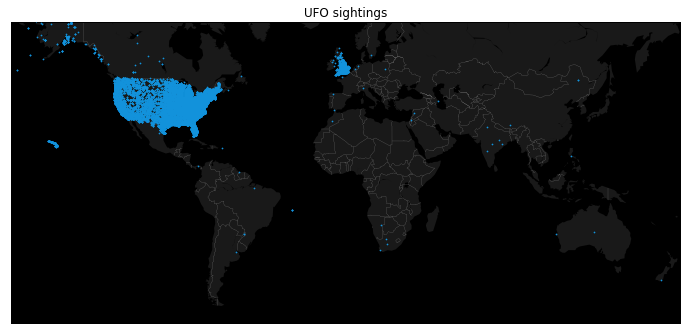

In [186]:
#plot lats and lons of UFO sightings on a basemap in the world

plt.figure(1, figsize=(12,6))

m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

mxy = m1(df["lon"].tolist(), df["lat"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("UFO sightings")
plt.savefig('UFO_sightings_world.png')
plt.show() #draw map



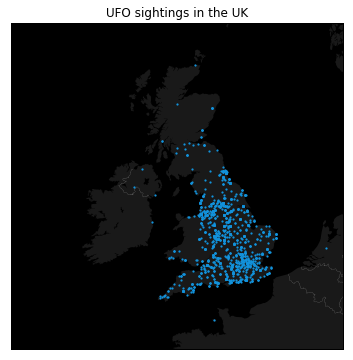

In [187]:
#UFO sightings in the UK

plt.figure(1, figsize=(12,6))

m1 = Basemap(projection='merc',
             llcrnrlat=48,
             urcrnrlat=60,
             llcrnrlon=-15,
             urcrnrlon=6,
             lat_ts=0,
             resolution='i')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders


mxy = m1(df["lon"].tolist(), df["lat"].tolist())
m1.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("UFO sightings in the UK")
plt.savefig('UFO_sightings_UK.png')
plt.show() #draw map


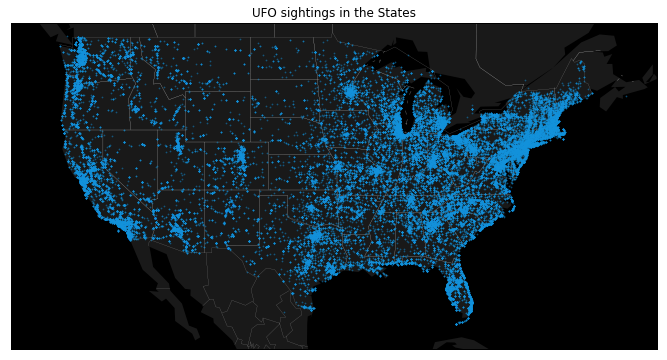

In [188]:
#UFO sightings in the states

plt.figure(1, figsize=(12,6))

m1 = Basemap(projection='merc',
             llcrnrlat=22,
             urcrnrlat=50,
             llcrnrlon=-130,
             urcrnrlon=-60,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
m1.drawstates(linewidth=0.1, color="w")                 # thin white line for state borders

mxy = m1(ufo_usa["lon"].tolist(), ufo_usa["lat"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=0.5, zorder=5)

plt.title("UFO sightings in the States")
plt.savefig('UFO_sightings_USA.png')
plt.show() #draw map


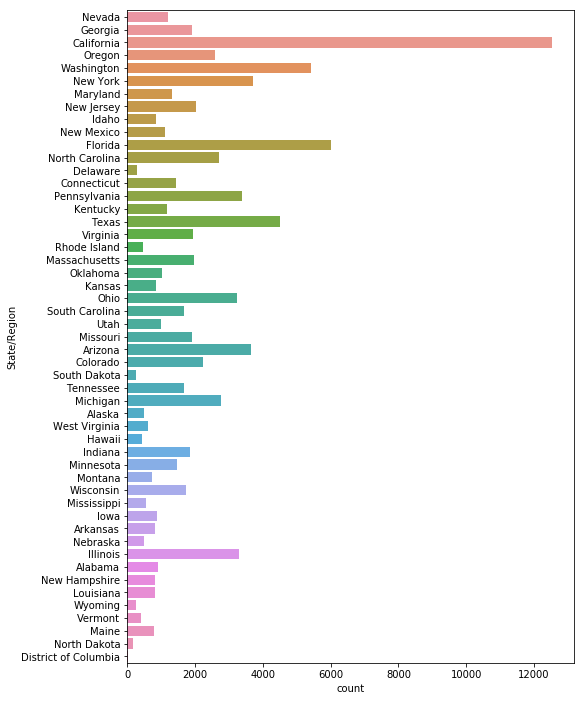

In [180]:
ufo_usa['State/Region'].value_counts()
plt.figure(figsize=(8,12))
ax = sns.countplot(y="State/Region", data=ufo_usa)

plt.savefig('UFO_sightings_USA_statecount.png')

In [170]:
df_met = pd.read_csv(os.path.join(data_directory, 'Meteorite_Landings.csv'))
df_met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
name           45716 non-null object
id             45716 non-null int64
nametype       45716 non-null object
recclass       45716 non-null object
mass (g)       45585 non-null float64
fall           45716 non-null object
year           45428 non-null object
reclat         38401 non-null float64
reclong        38401 non-null float64
GeoLocation    38401 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


In [171]:
df_met.head()


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [172]:
df_met['GeoLocation'] = df_met['GeoLocation'].astype(str)

df_met['lat'], df_met['lon'] = df_met['GeoLocation'].str.split(' ', 1).str
df_met['lat'] = df_met['lat'].str.strip('(,')
df_met['lon'] = df_met['lon'].str.strip(' )')



df_met['lat'] = df_met['lat'].astype(float)
df_met['lon'] = df_met['lon'].astype(float)

df_met.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,lat,lon
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775000, 6.083330)",50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.183330, 10.233330)",56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.216670, -113.000000)",54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.883330, -99.900000)",16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.166670, -64.950000)",-33.16667,-64.95000


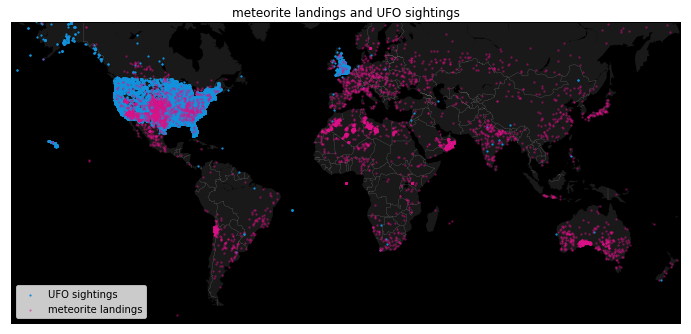

In [189]:
#plot lats and lons of meteorite landing on a basemap in the world

plt.figure(1, figsize=(12,6))

m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

mxy_1 = m1(df["lon"].tolist(), df["lat"].tolist())
m1.scatter(mxy_1[0], mxy_1[1], s=5, c="#1292db", lw=0, alpha=1, zorder=5, label='UFO sightings')

mxy = m1(df_met["lon"].tolist(), df_met["lat"].tolist())
m1.scatter(mxy[0], mxy[1], s=5, c="#db1187", lw=0, alpha=0.5, zorder=5, label='meteorite landings')

plt.legend()
plt.title("meteorite landings and UFO sightings")

plt.savefig('UFO_sightings_meteorite_landings_world.png')
plt.show() #draw map



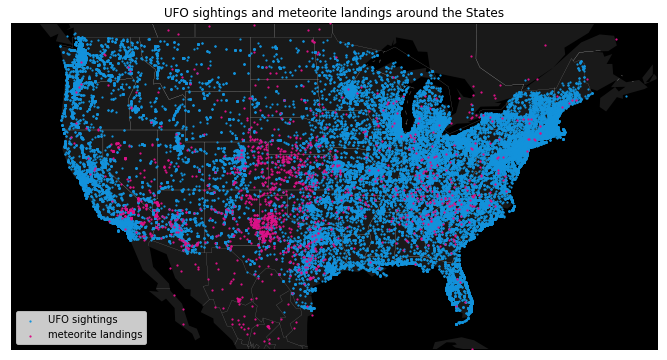

In [190]:
#UFO sightings  and meteorite landings in the states

plt.figure(1, figsize=(12,6))

m1 = Basemap(projection='merc',
             llcrnrlat=22,
             urcrnrlat=50,
             llcrnrlon=-130,
             urcrnrlon=-60,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
m1.drawstates(linewidth=0.1, color="w")                 # thin white line for state borders

mxy_1 = m1(df["lon"].tolist(), df["lat"].tolist())
m1.scatter(mxy_1[0], mxy_1[1], s=5, c="#1292db", lw=0, alpha=1, zorder=5, label='UFO sightings')

mxy = m1(df_met["lon"].tolist(), df_met["lat"].tolist())
m1.scatter(mxy[0], mxy[1], s=5, c="#db1187", lw=0, alpha=1, zorder=5, label='meteorite landings')

plt.legend()
plt.title("UFO sightings and meteorite landings around the States")
plt.savefig('UFO_sightings_meteorite_landings_USA.png')
plt.show() #draw map


In [175]:
df_fire = pd.read_csv(os.path.join(data_directory, 'Fireball Reports.csv'))
df_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 10 columns):
DateTime of Peak Brightness            92 non-null object
Latitude                               92 non-null float64
Longitude                              92 non-null float64
Altitude (km)                          68 non-null float64
Velocity (km/s)                        7 non-null float64
Velocity Components (km/s): vx         52 non-null float64
Velocity Components (km/s): vy         52 non-null float64
Velocity Components (km/s): vz         52 non-null float64
Total Radiated Energy (J)              92 non-null int64
Calculated Total Impact Energy (kt)    92 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 7.3+ KB


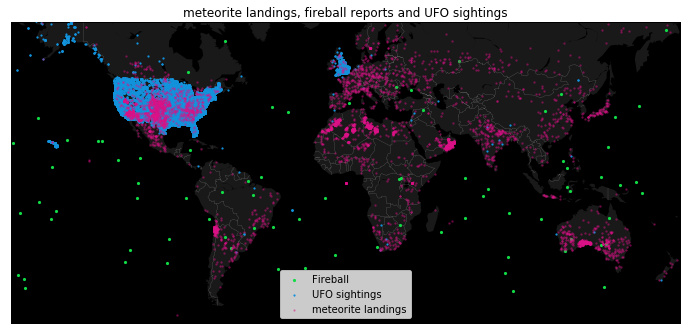

In [192]:
#plot lats and lons of meteorite on a basemap in the world

plt.figure(1, figsize=(12,6))

m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

mxy_2 = m1(df_fire["Longitude"].tolist(), df_fire["Latitude"].tolist())
m1.scatter(mxy_2[0], mxy_2[1], s=10, c="#11db46", lw=0, alpha=1, zorder=5, label='Fireball')

mxy_1 = m1(df["lon"].tolist(), df["lat"].tolist())
m1.scatter(mxy_1[0], mxy_1[1], s=5, c="#1292db", lw=0, alpha=1, zorder=5, label='UFO sightings')

mxy = m1(df_met["lon"].tolist(), df_met["lat"].tolist())
m1.scatter(mxy[0], mxy[1], s=5, c="#db1187", lw=0, alpha=0.5, zorder=5, label='meteorite landings')

plt.legend()
plt.title("meteorite landings, fireball reports and UFO sightings")
plt.savefig('UFO_sightings_meteorite_landings_fireball_reports_world.png')
plt.show() #draw map
